In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl
#!pip install Shapely
!pip install descartes

In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [6]:
from util import load_data_from_txt, calculate_derivative,convert_timestamp2hour
from baseline import detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3, detect_breakpoints_startPoint
from plot import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details
from plot2 import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details,plot_detection_statistics,plot_histogram

In [18]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
colum_names ={"pressure":["Date","Pressure (psia)","first_order_derivative","second_order_derivative"],
                    "rate":["Time@end","Liquid rate (STB/D)"]}

45


In [8]:
input_file="../data_input/Synthetic_Data.xlsx"
pressure_sheet="Pressure"
pressure_df = pd.DataFrame(pd.read_excel(input_file, sheet_name=pressure_sheet))
display(pressure_df)
start_timestamp=pressure_df["Date"][0]
pressure_df["Date"]=convert_timestamp2hour(start_timestamp,pressure_df["Date"])
pressure_df

,Date,Pressure (psia)
0,2019-01-01 00:00:00,2000.000000
1,2019-01-01 00:00:22,2092.738568
2,2019-01-01 00:00:44,2125.952010
3,2019-01-01 00:01:05,2149.773050
4,2019-01-01 00:01:27,2168.851204
...,...,...
3514,2019-09-05 10:03:05,2327.338989
3515,2019-09-06 16:20:44,2322.764893
3516,2019-09-07 22:38:24,2318.352641
3517,2019-09-09 04:56:04,2314.092149


,Date,Pressure (psia)
0,0.000000,2000.000000
1,0.006111,2092.738568
2,0.012222,2125.952010
3,0.018056,2149.773050
4,0.024167,2168.851204
...,...,...
3514,5938.051389,2327.338989
3515,5968.345556,2322.764893
3516,5998.640000,2318.352641
3517,6028.934444,2314.092149


In [9]:
input_file="../data_input/Synthetic_Data.xlsx"
rate_sheet="Rate"
rate_df = pd.DataFrame(pd.read_excel(input_file, sheet_name=rate_sheet))
# display(rate_df)
rate_df["Time@end"]=convert_timestamp2hour(start_timestamp,rate_df["Time@end"])
rate_df

,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


In [10]:
#calculate first & second derivative
x_coordinate=pressure_df["Date"]
y_coordinate=pressure_df["Pressure (psia)"]
first_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

x_coordinate=pressure_df["Date"]
y_coordinate=first_order_derivative
second_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

#add first and second derivative to pressure_df dataframe
pressure_df["first_order_derivative"]=first_order_derivative
pressure_df["second_order_derivative"]=second_order_derivative
# pd.set_option('display.max_rows', pressure_df.shape[0]+1)
display(pressure_df)

,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


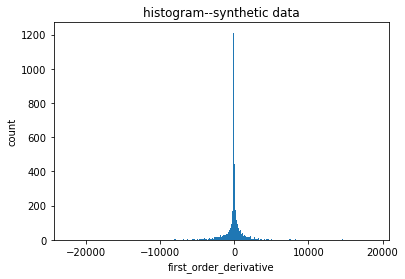

In [11]:
data=pressure_df["first_order_derivative"]
xlabel="first_order_derivative"
ylabel="count"
title='histogram--synthetic data'
plot_histogram(data, xlabel, ylabel,title)

In [12]:
breakpoints_detected=detect_breakpoints(first_order_derivative)
print(len(breakpoints_detected))
print(breakpoints_detected)

2528.518177413723
50
[107, 164, 243, 375, 446, 504, 523, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2807, 3101, 3284]


2528.518177413723 272776.92851259984
57
[107, 164, 243, 328, 375, 446, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
breakpoints_faultyDetected [546, 568, 592, 611, 2137, 2156, 2698, 2713, 2746, 2764, 2789, 2807]
breakpoints_missed []


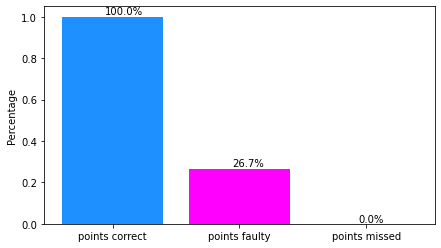

findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


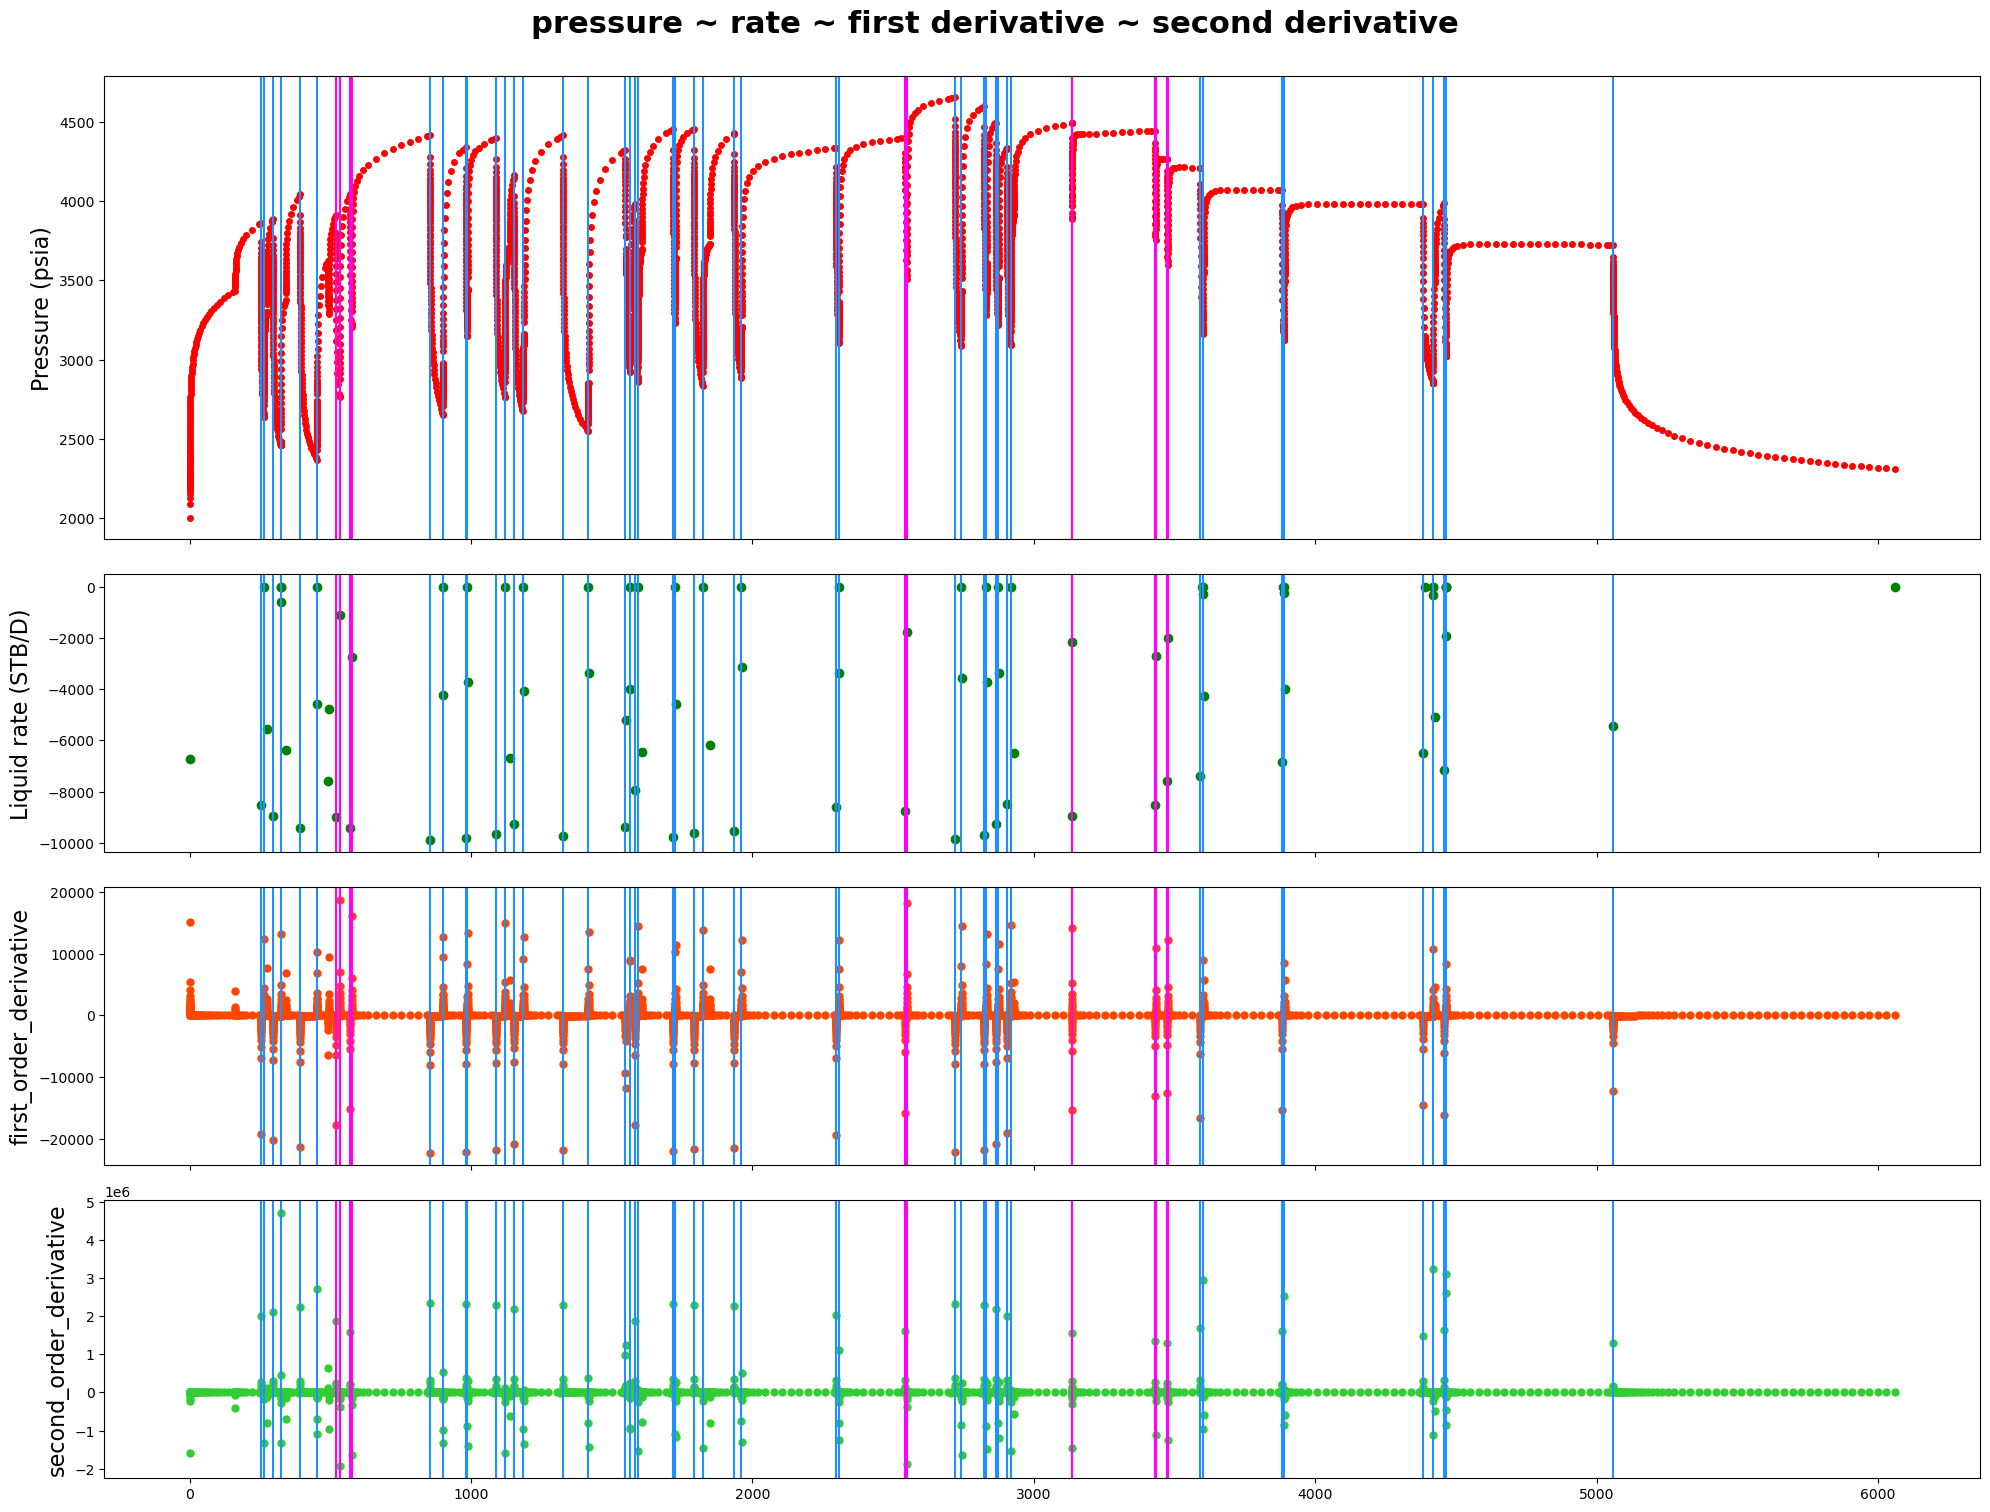

In [13]:
breakpoints_detected=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print(len(breakpoints_detected))
print(breakpoints_detected)
plot_detection_statistics(breakpoints_detected,ground_truth)

plot_4_metrics(pressure_df,
               rate_df,
               breakpoints_detected,
               ground_truth,
               colum_names)

detected 57 as breakpoints
The plot is devided into 6 rows
------row 1-----correctly detected points:[107, 164, 243, 328, 375, 446, 644]
------row 1-----faulty detected points:[546, 568, 592, 611]
------row 1-----missed breakpoints:[]


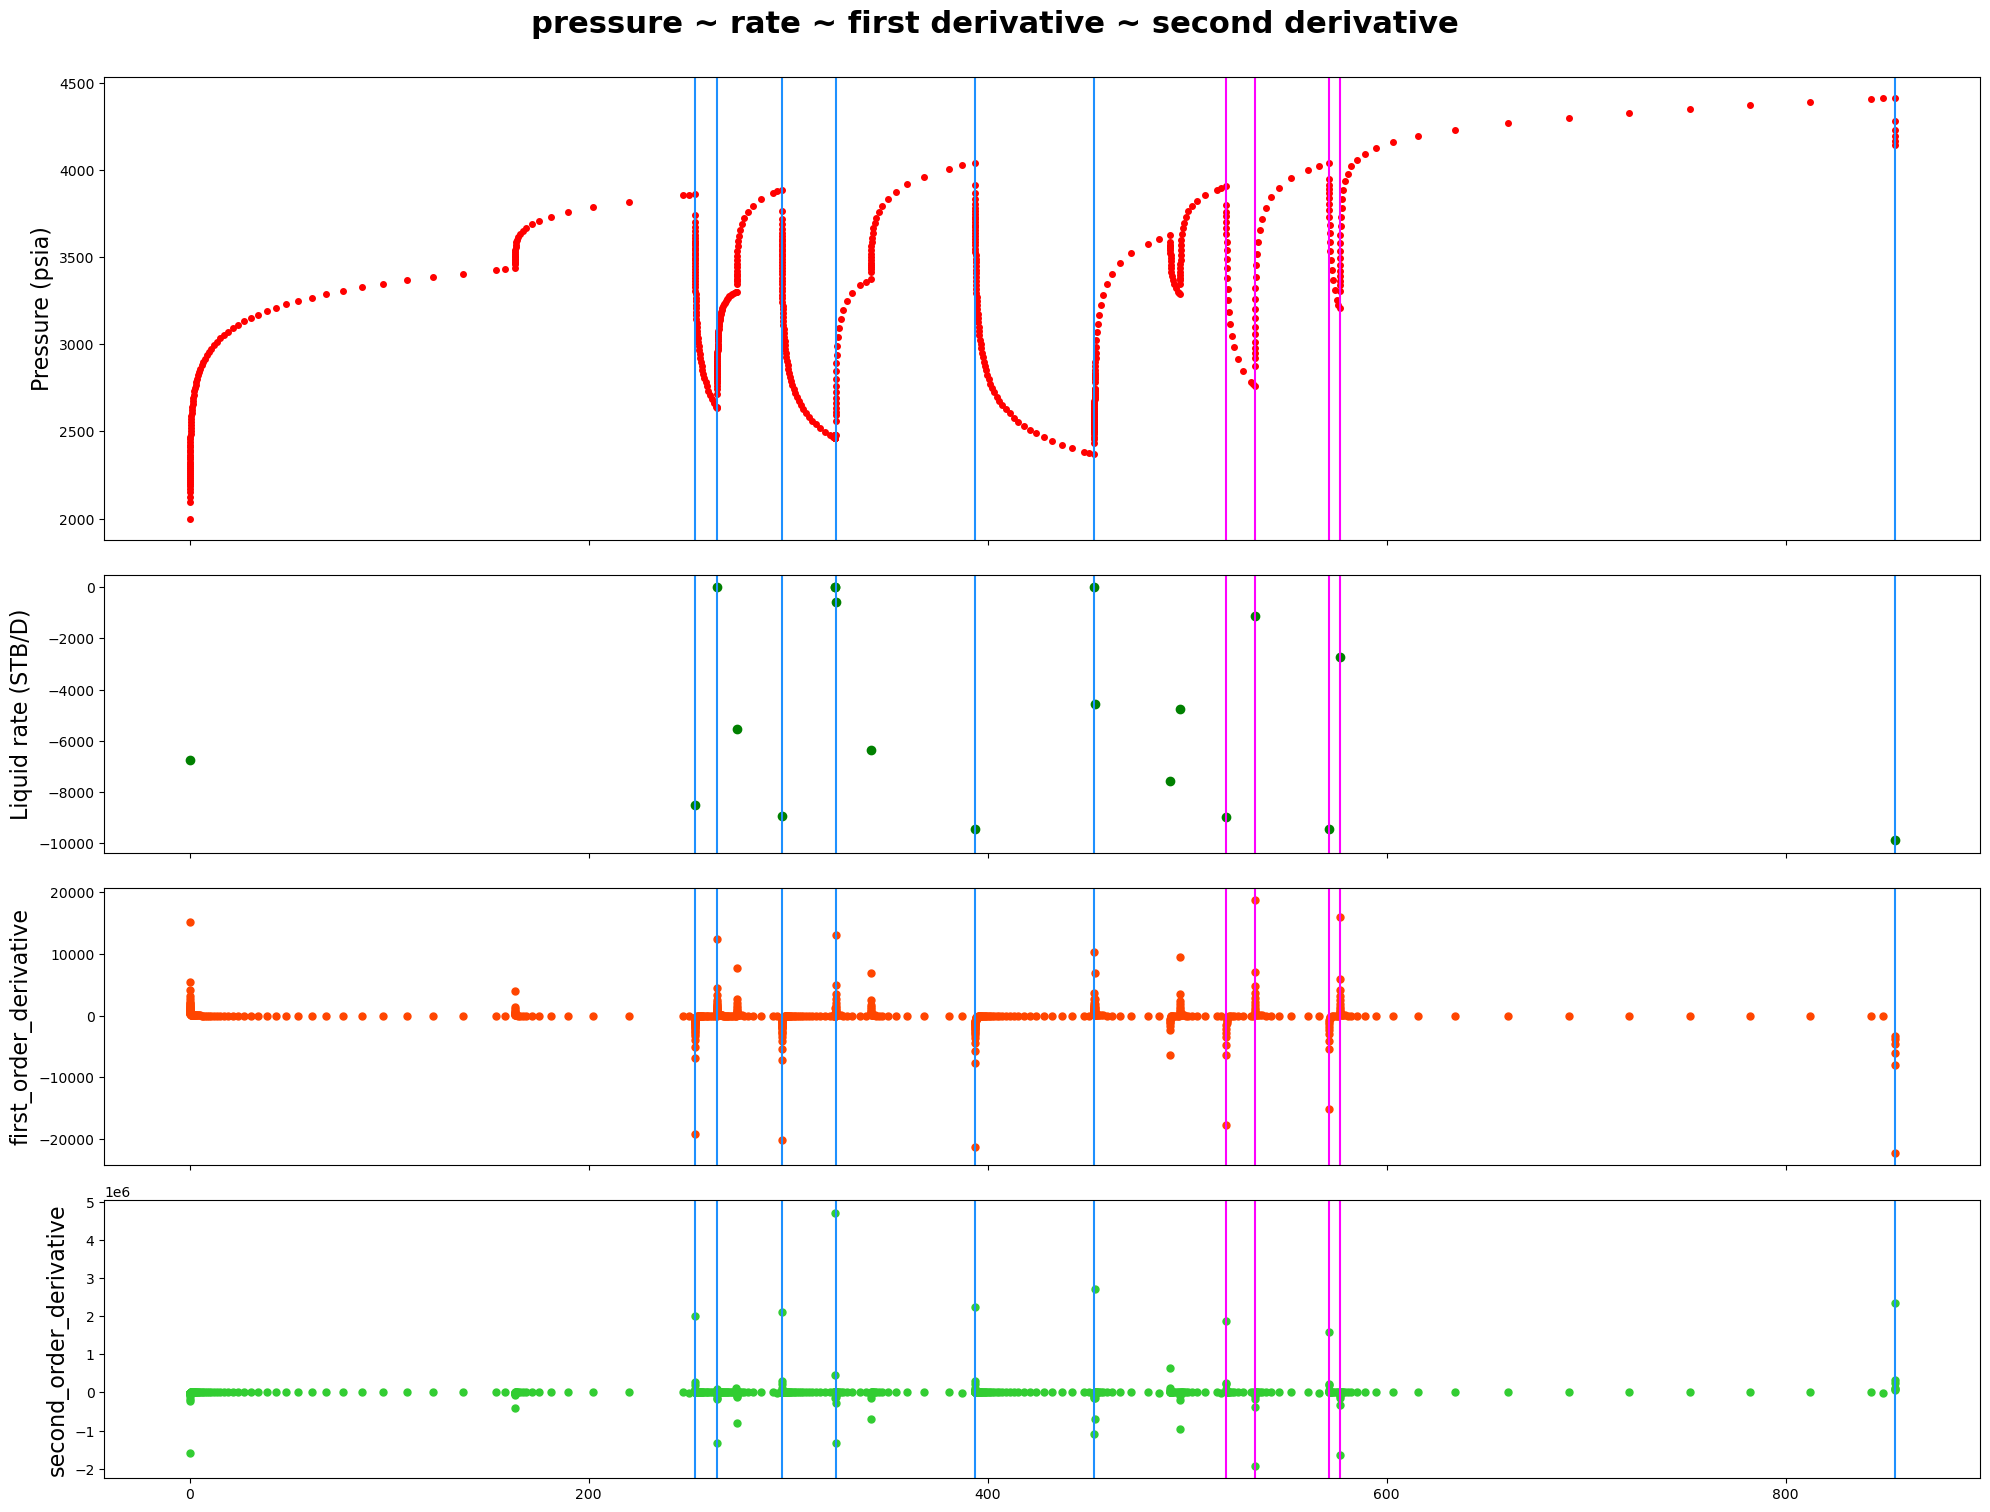

------row 2-----correctly detected points:[713, 771, 820, 887, 953, 1036, 1101, 1179, 1254]
------row 2-----faulty detected points:[]
------row 2-----missed breakpoints:[]


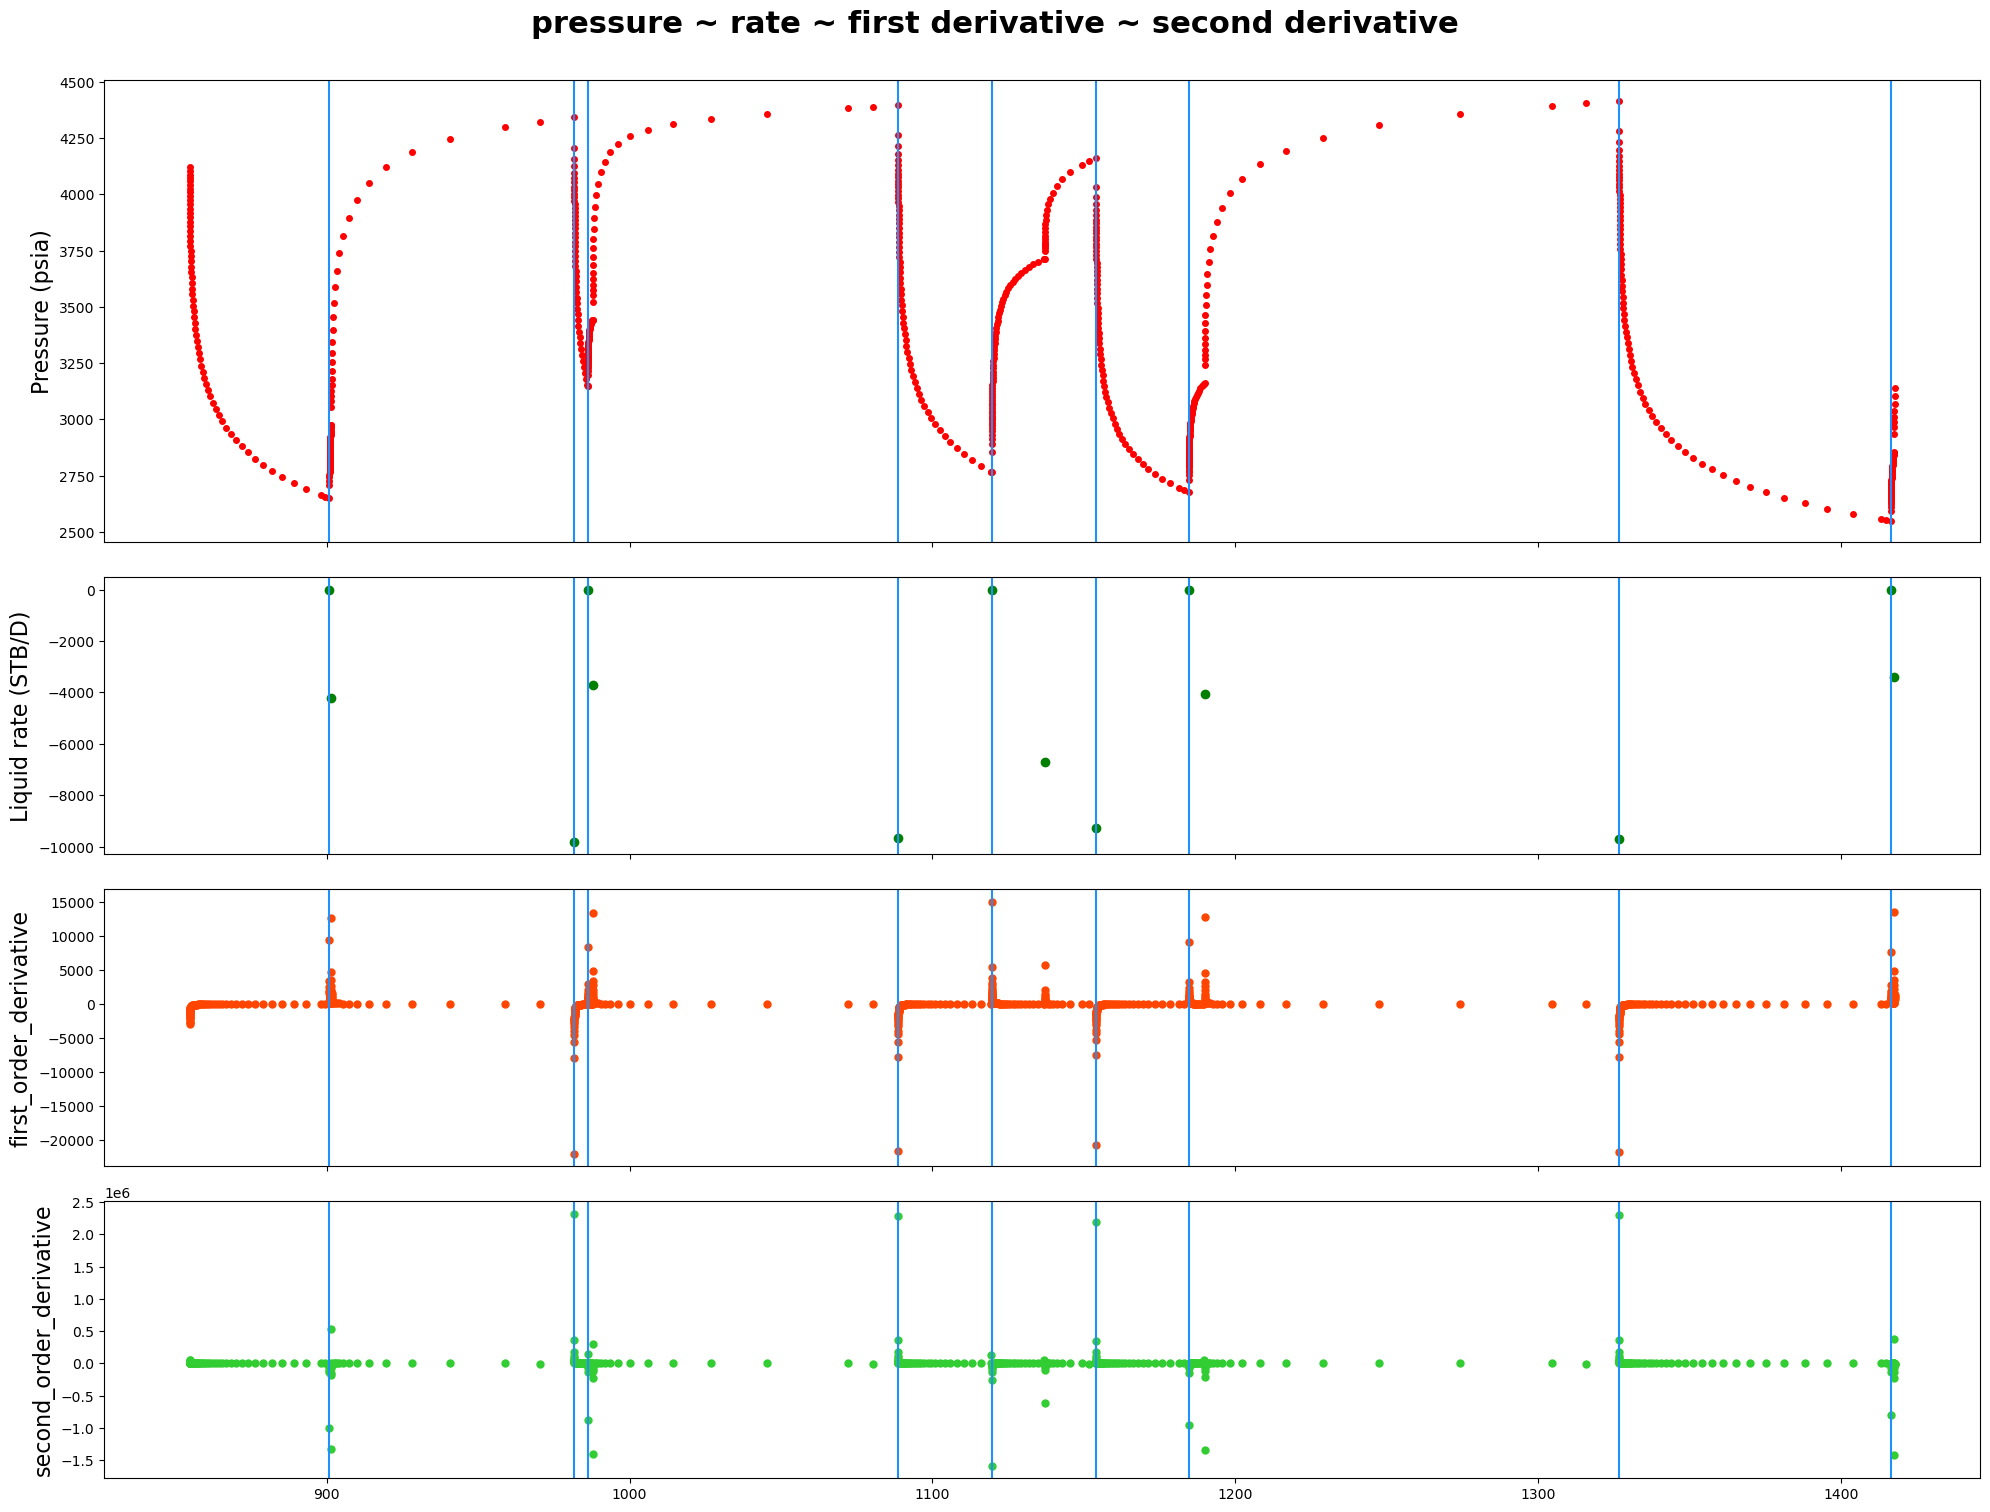

------row 3-----correctly detected points:[1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938]
------row 3-----faulty detected points:[]
------row 3-----missed breakpoints:[]


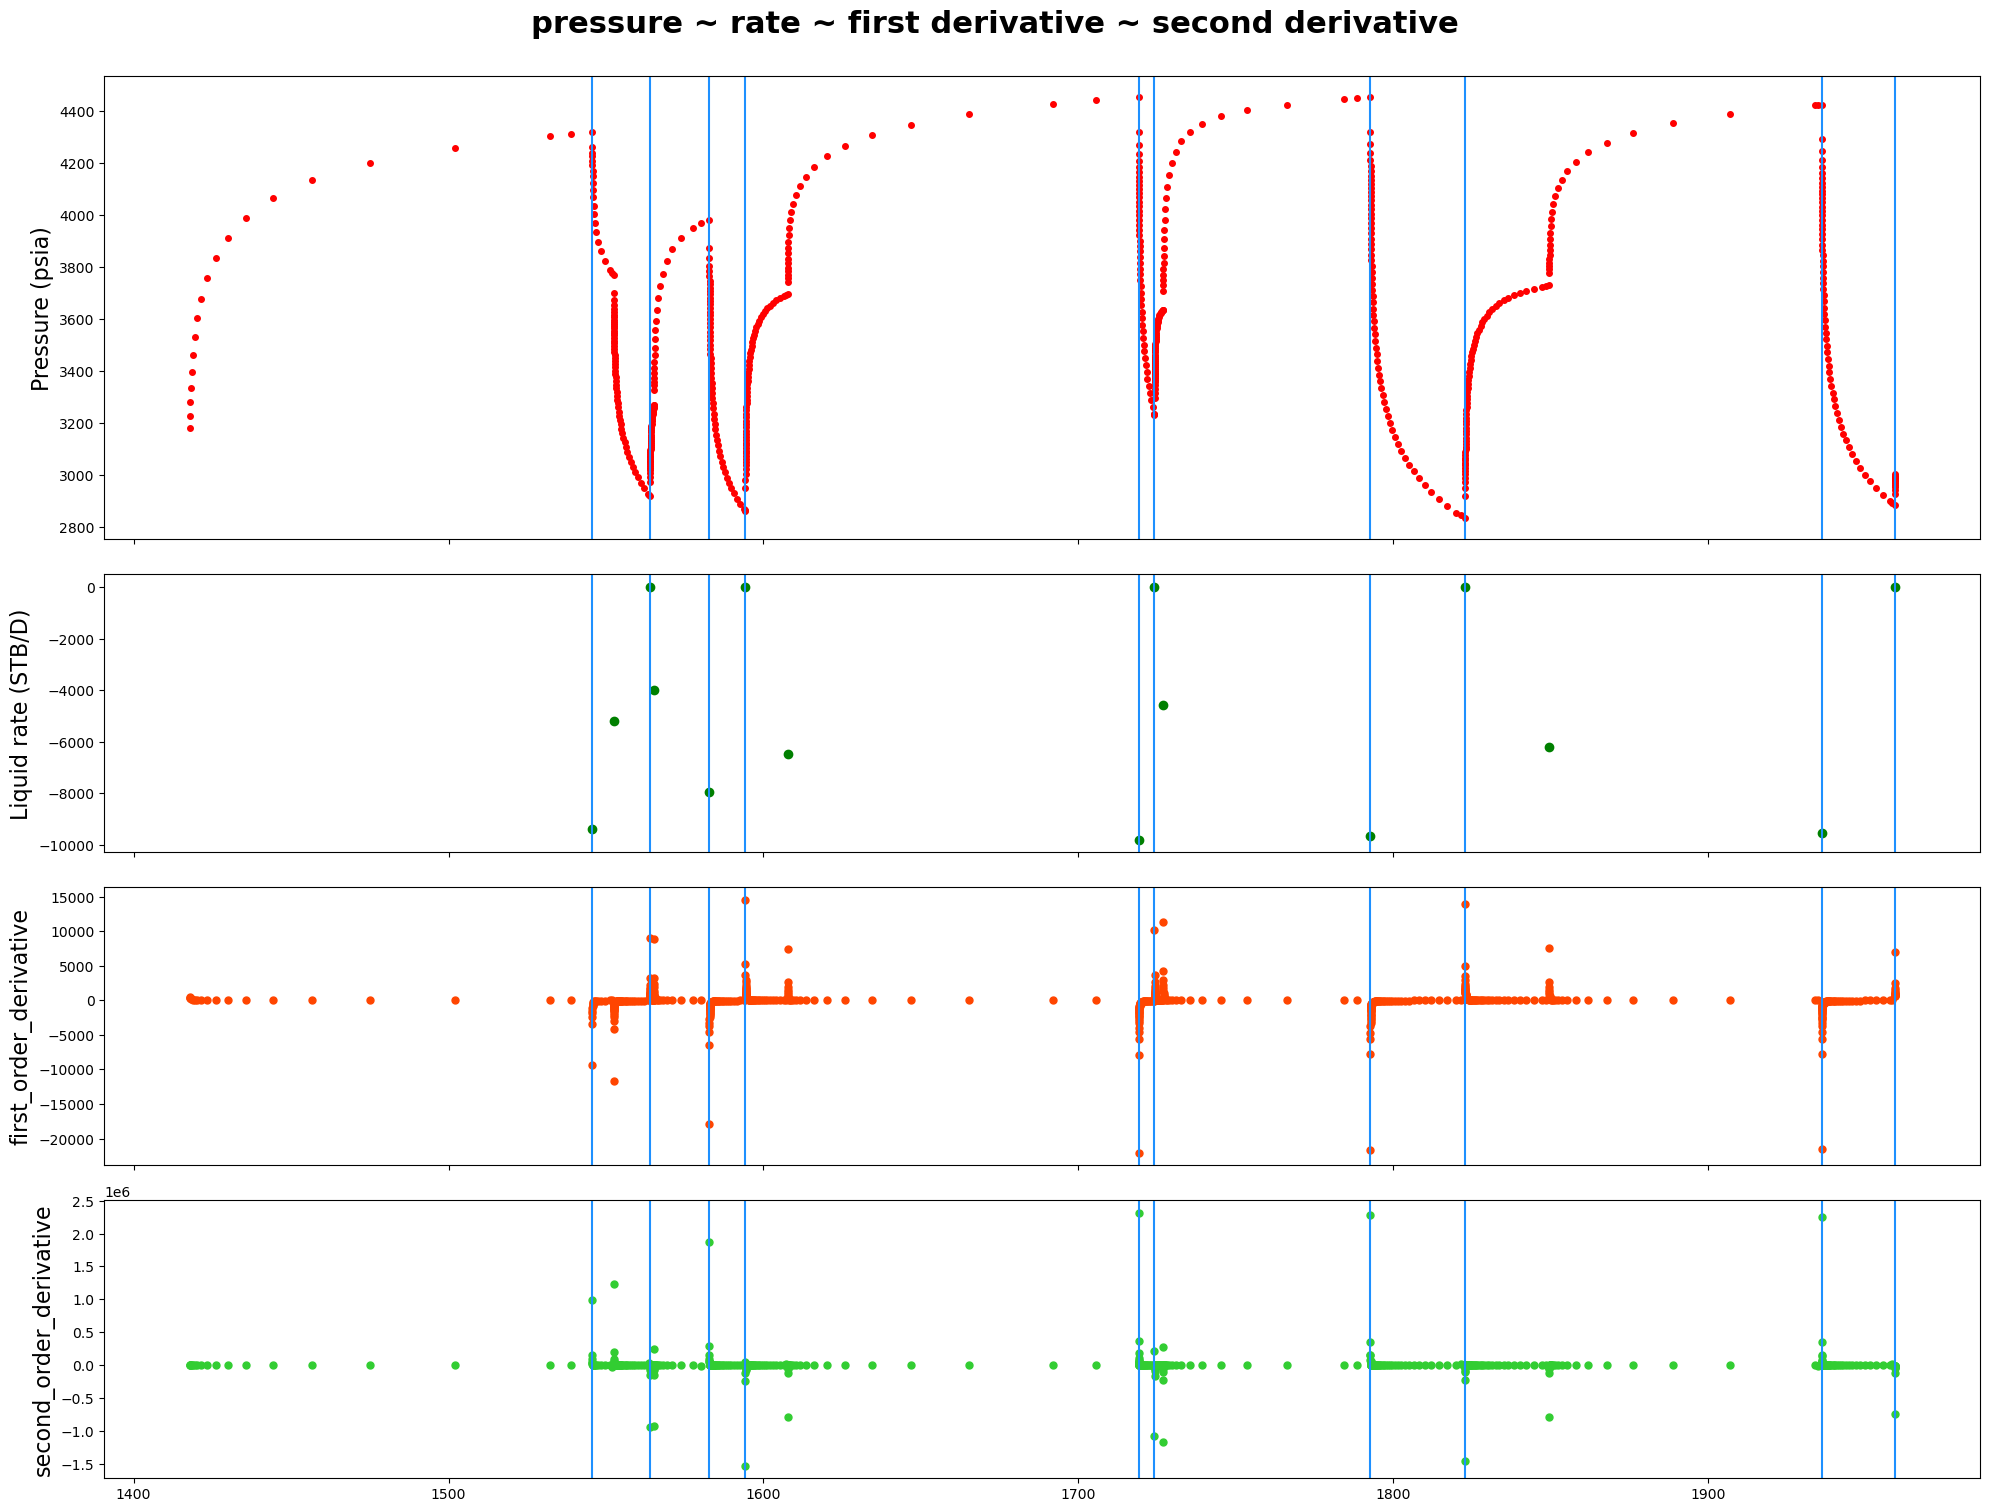

------row 4-----correctly detected points:[2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552]
------row 4-----faulty detected points:[2137, 2156]
------row 4-----missed breakpoints:[]


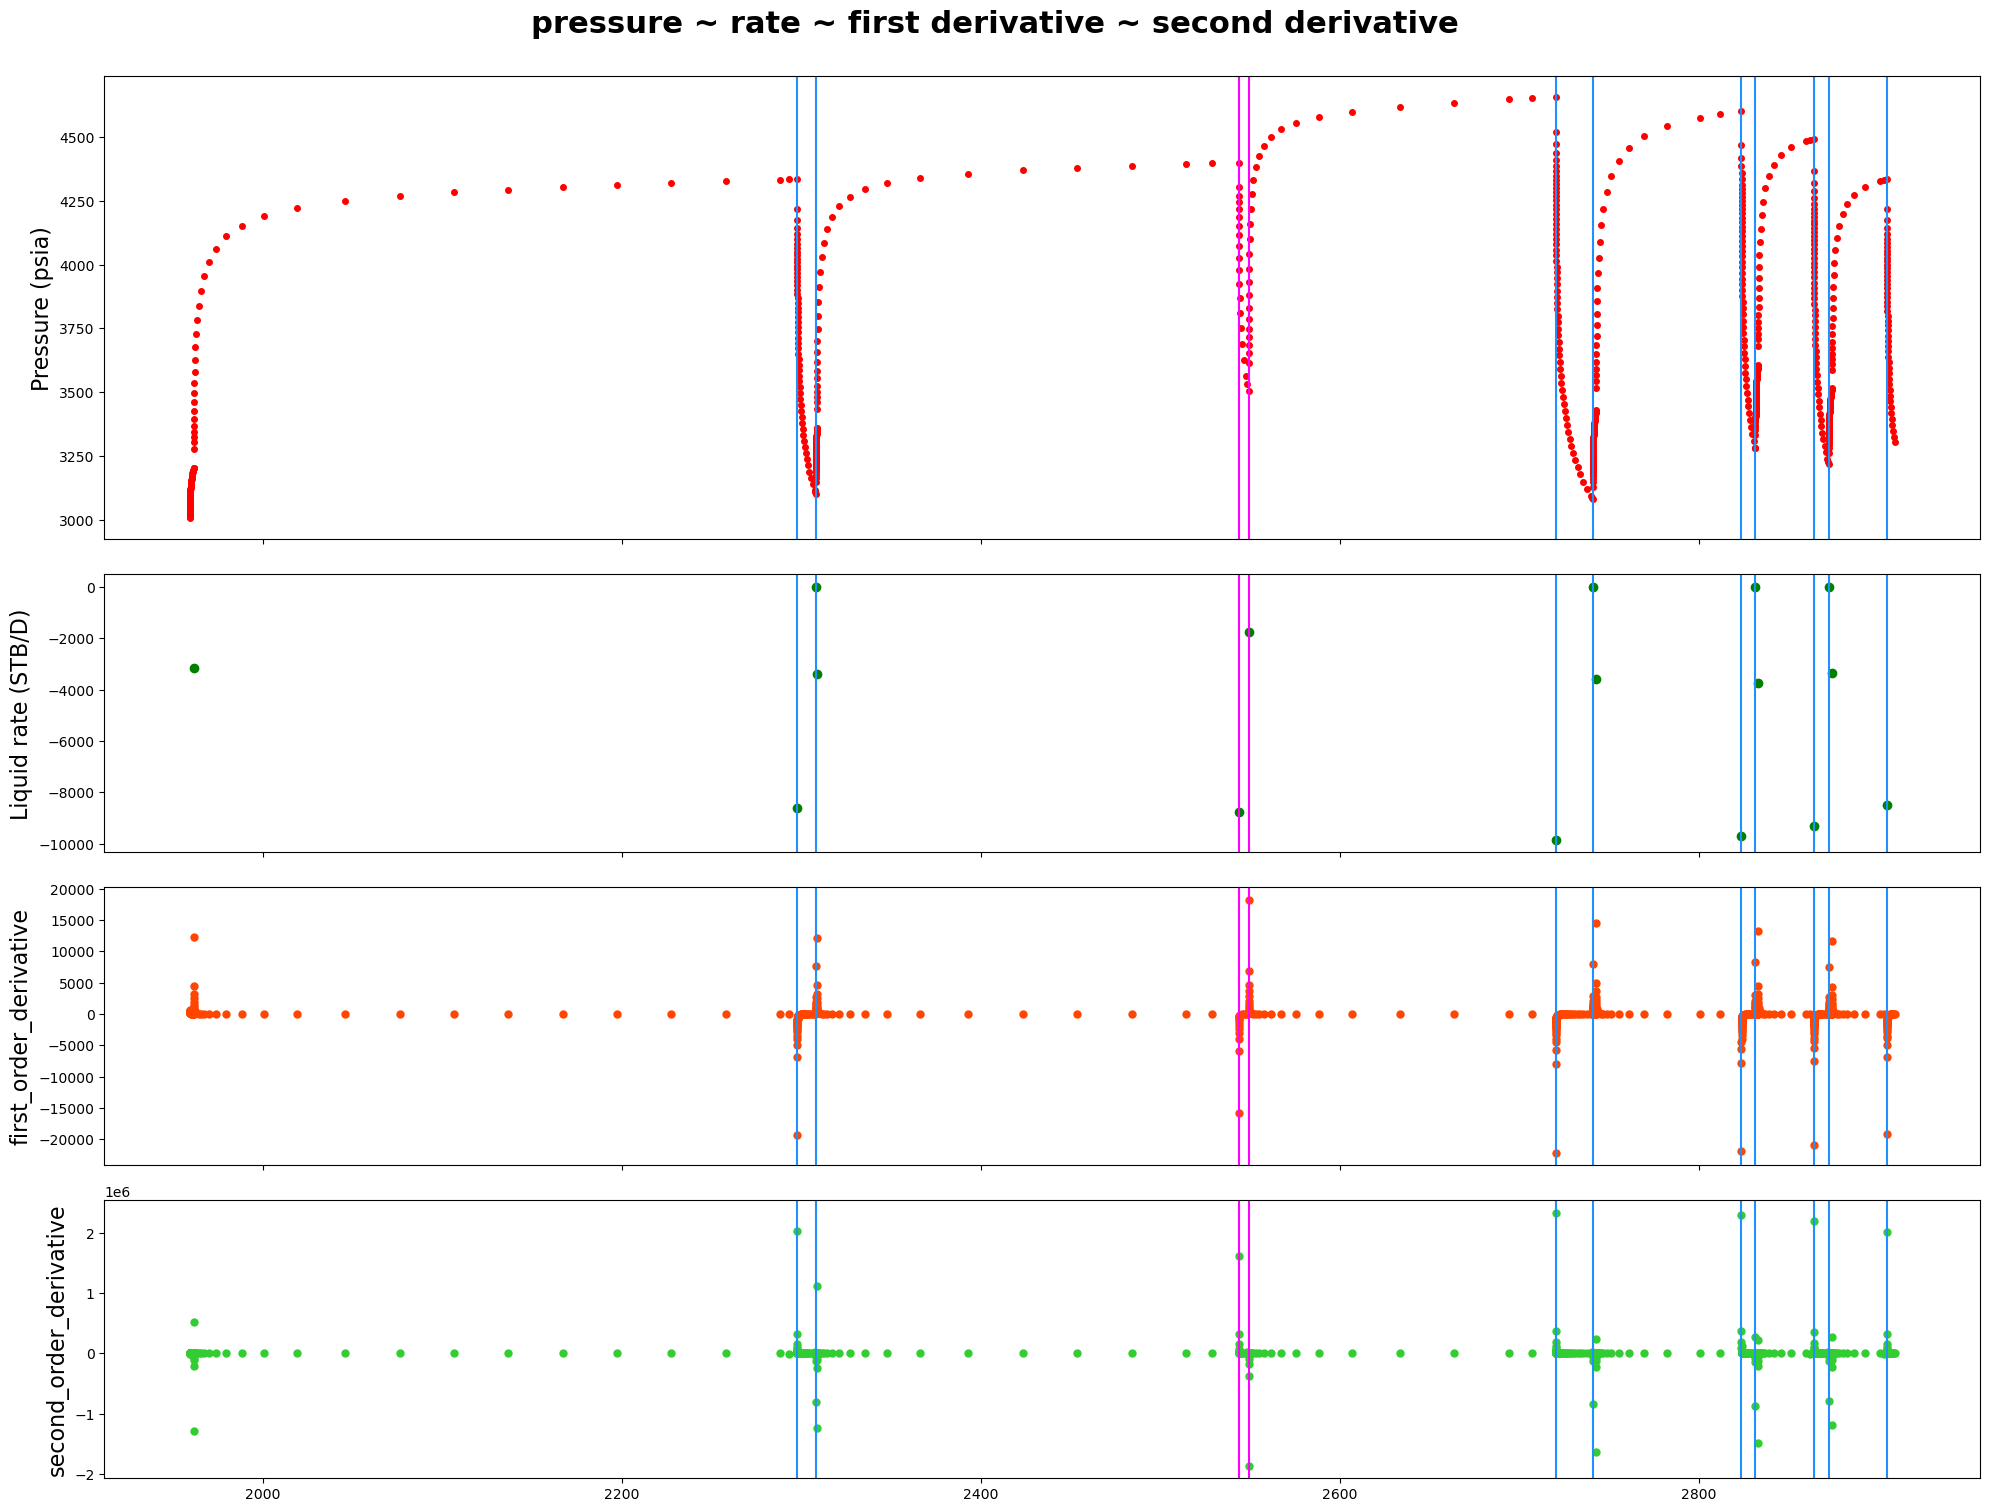

------row 5-----correctly detected points:[2610, 2835, 2916, 2965, 3044, 3101, 3240]
------row 5-----faulty detected points:[2698, 2713, 2746, 2764, 2789, 2807]
------row 5-----missed breakpoints:[]


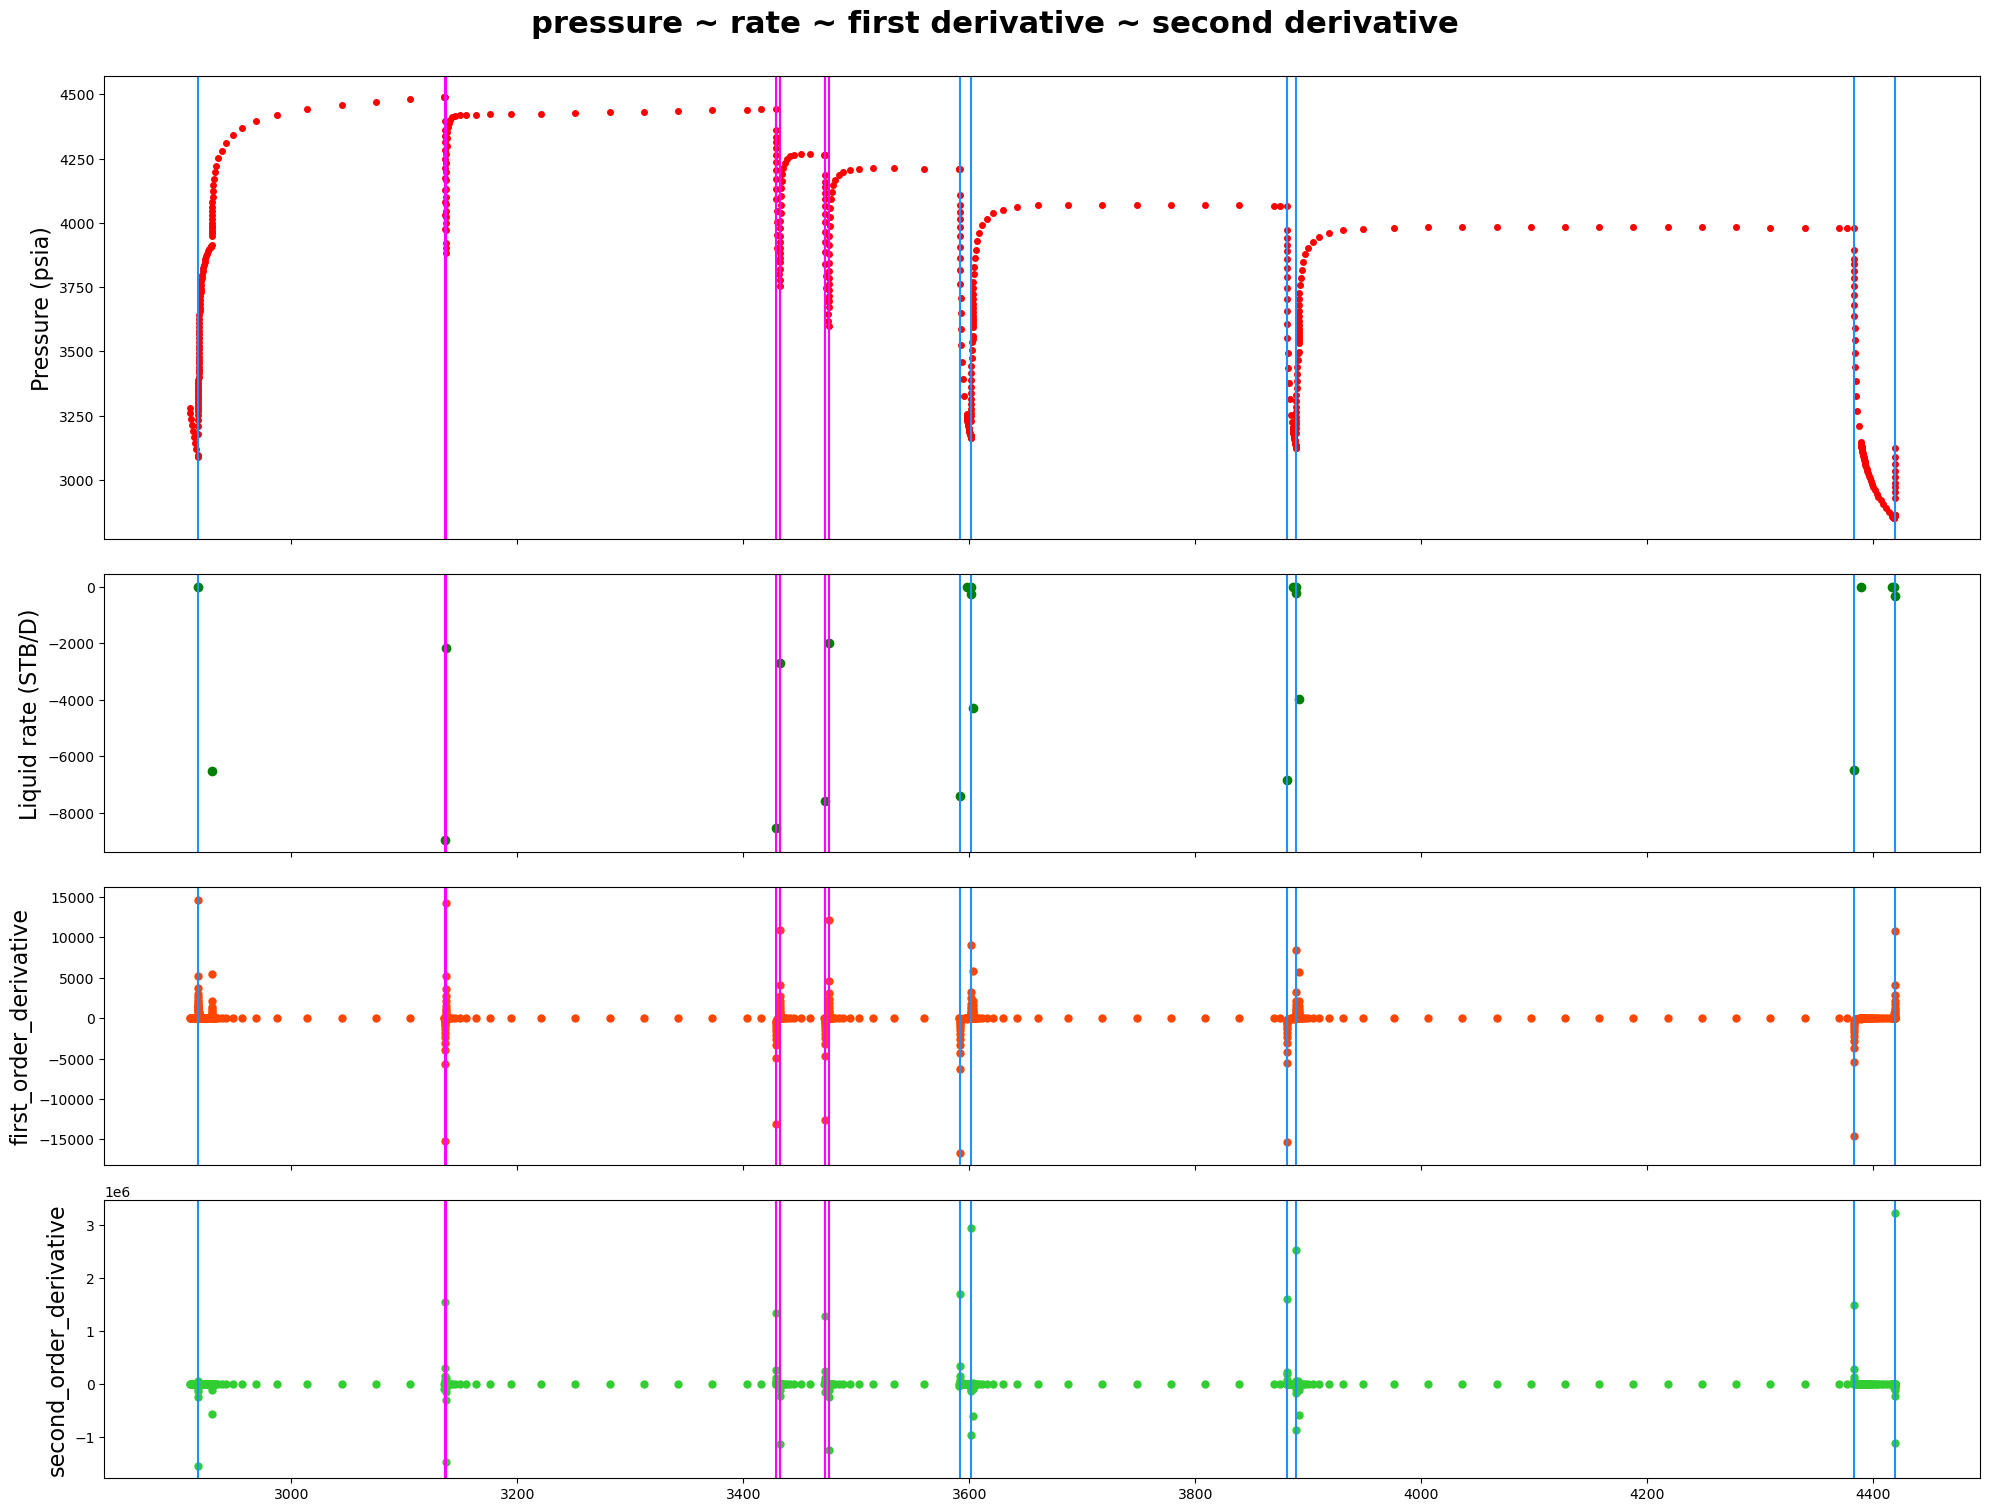

------row 6-----correctly detected points:[3284, 3368, 3411]
------row 6-----faulty detected points:[]
------row 6-----missed breakpoints:[]


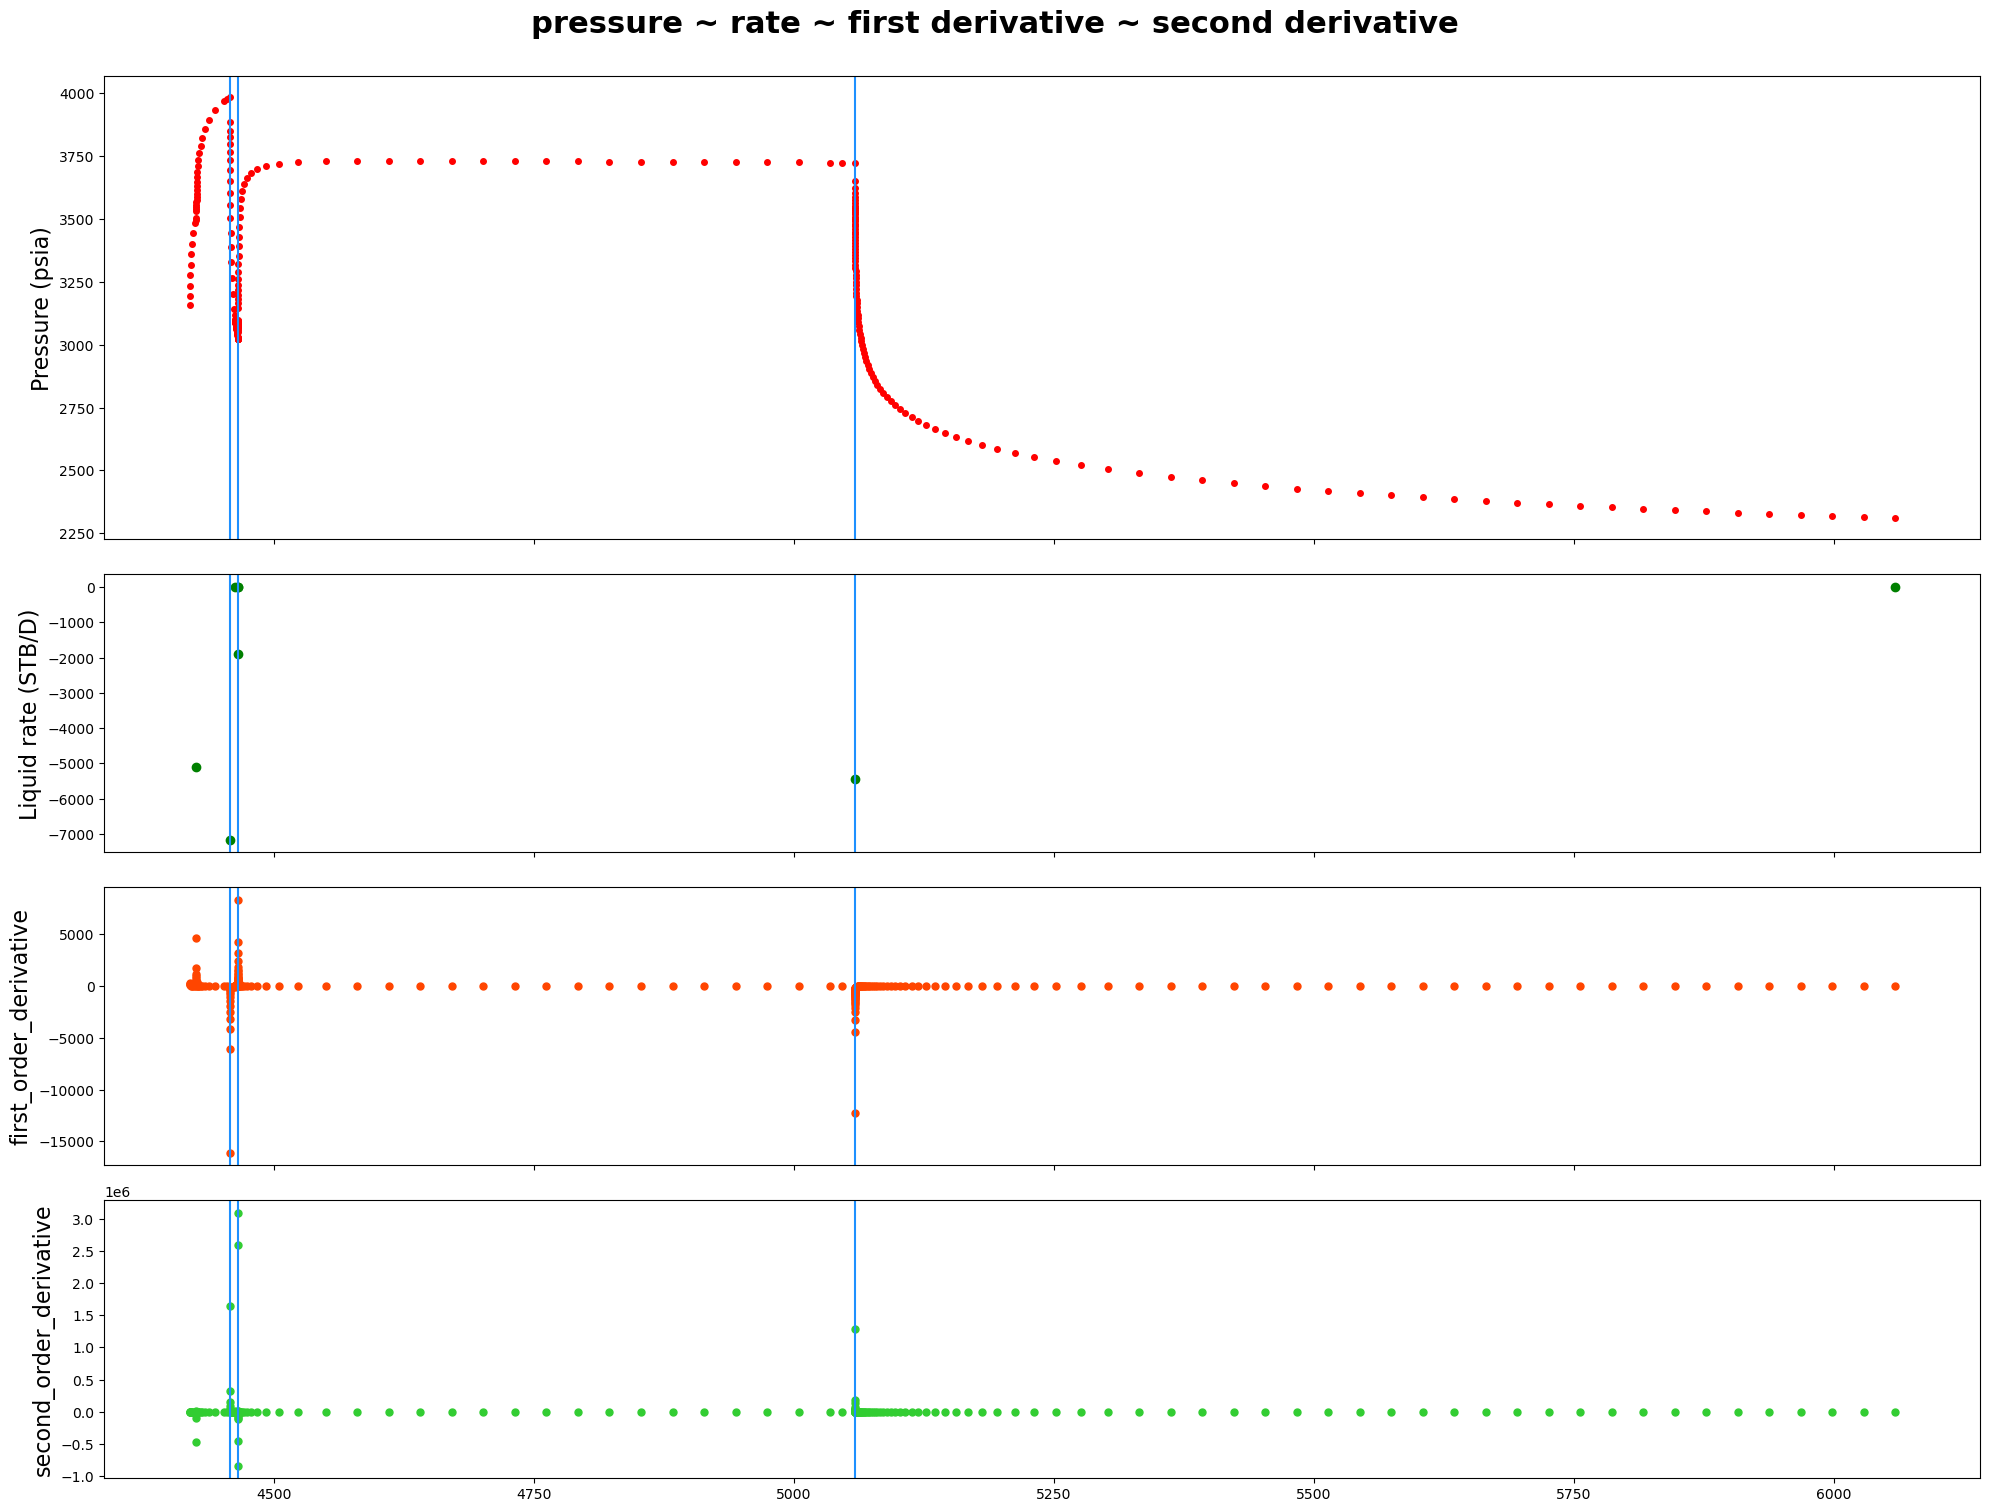

In [14]:
data_inOneRow=650
plot_4_metrics_details(data_inOneRow,
                       pressure_df,
                       rate_df,
                       breakpoints_detected,
                       ground_truth,
                       colum_names)

2528.518177413723 272776.92851259984
57
[107, 164, 243, 375, 446, 504, 523, 546, 568, 592, 611, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1339, 1396, 1434, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2137, 2156, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2698, 2713, 2746, 2764, 2789, 2807, 2916, 2965, 3044, 3101, 3284, 3411]
breakpoints_faultyDetected [504, 523, 546, 568, 592, 611, 1339, 1434, 2137, 2156, 2698, 2713, 2746, 2764, 2789, 2807]
breakpoints_missed [328, 2835, 3240, 3368]


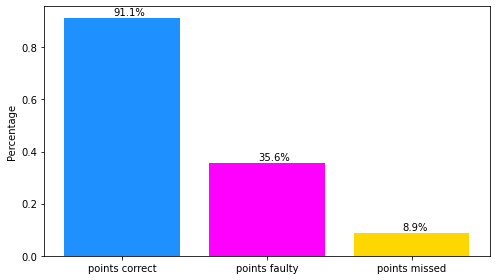

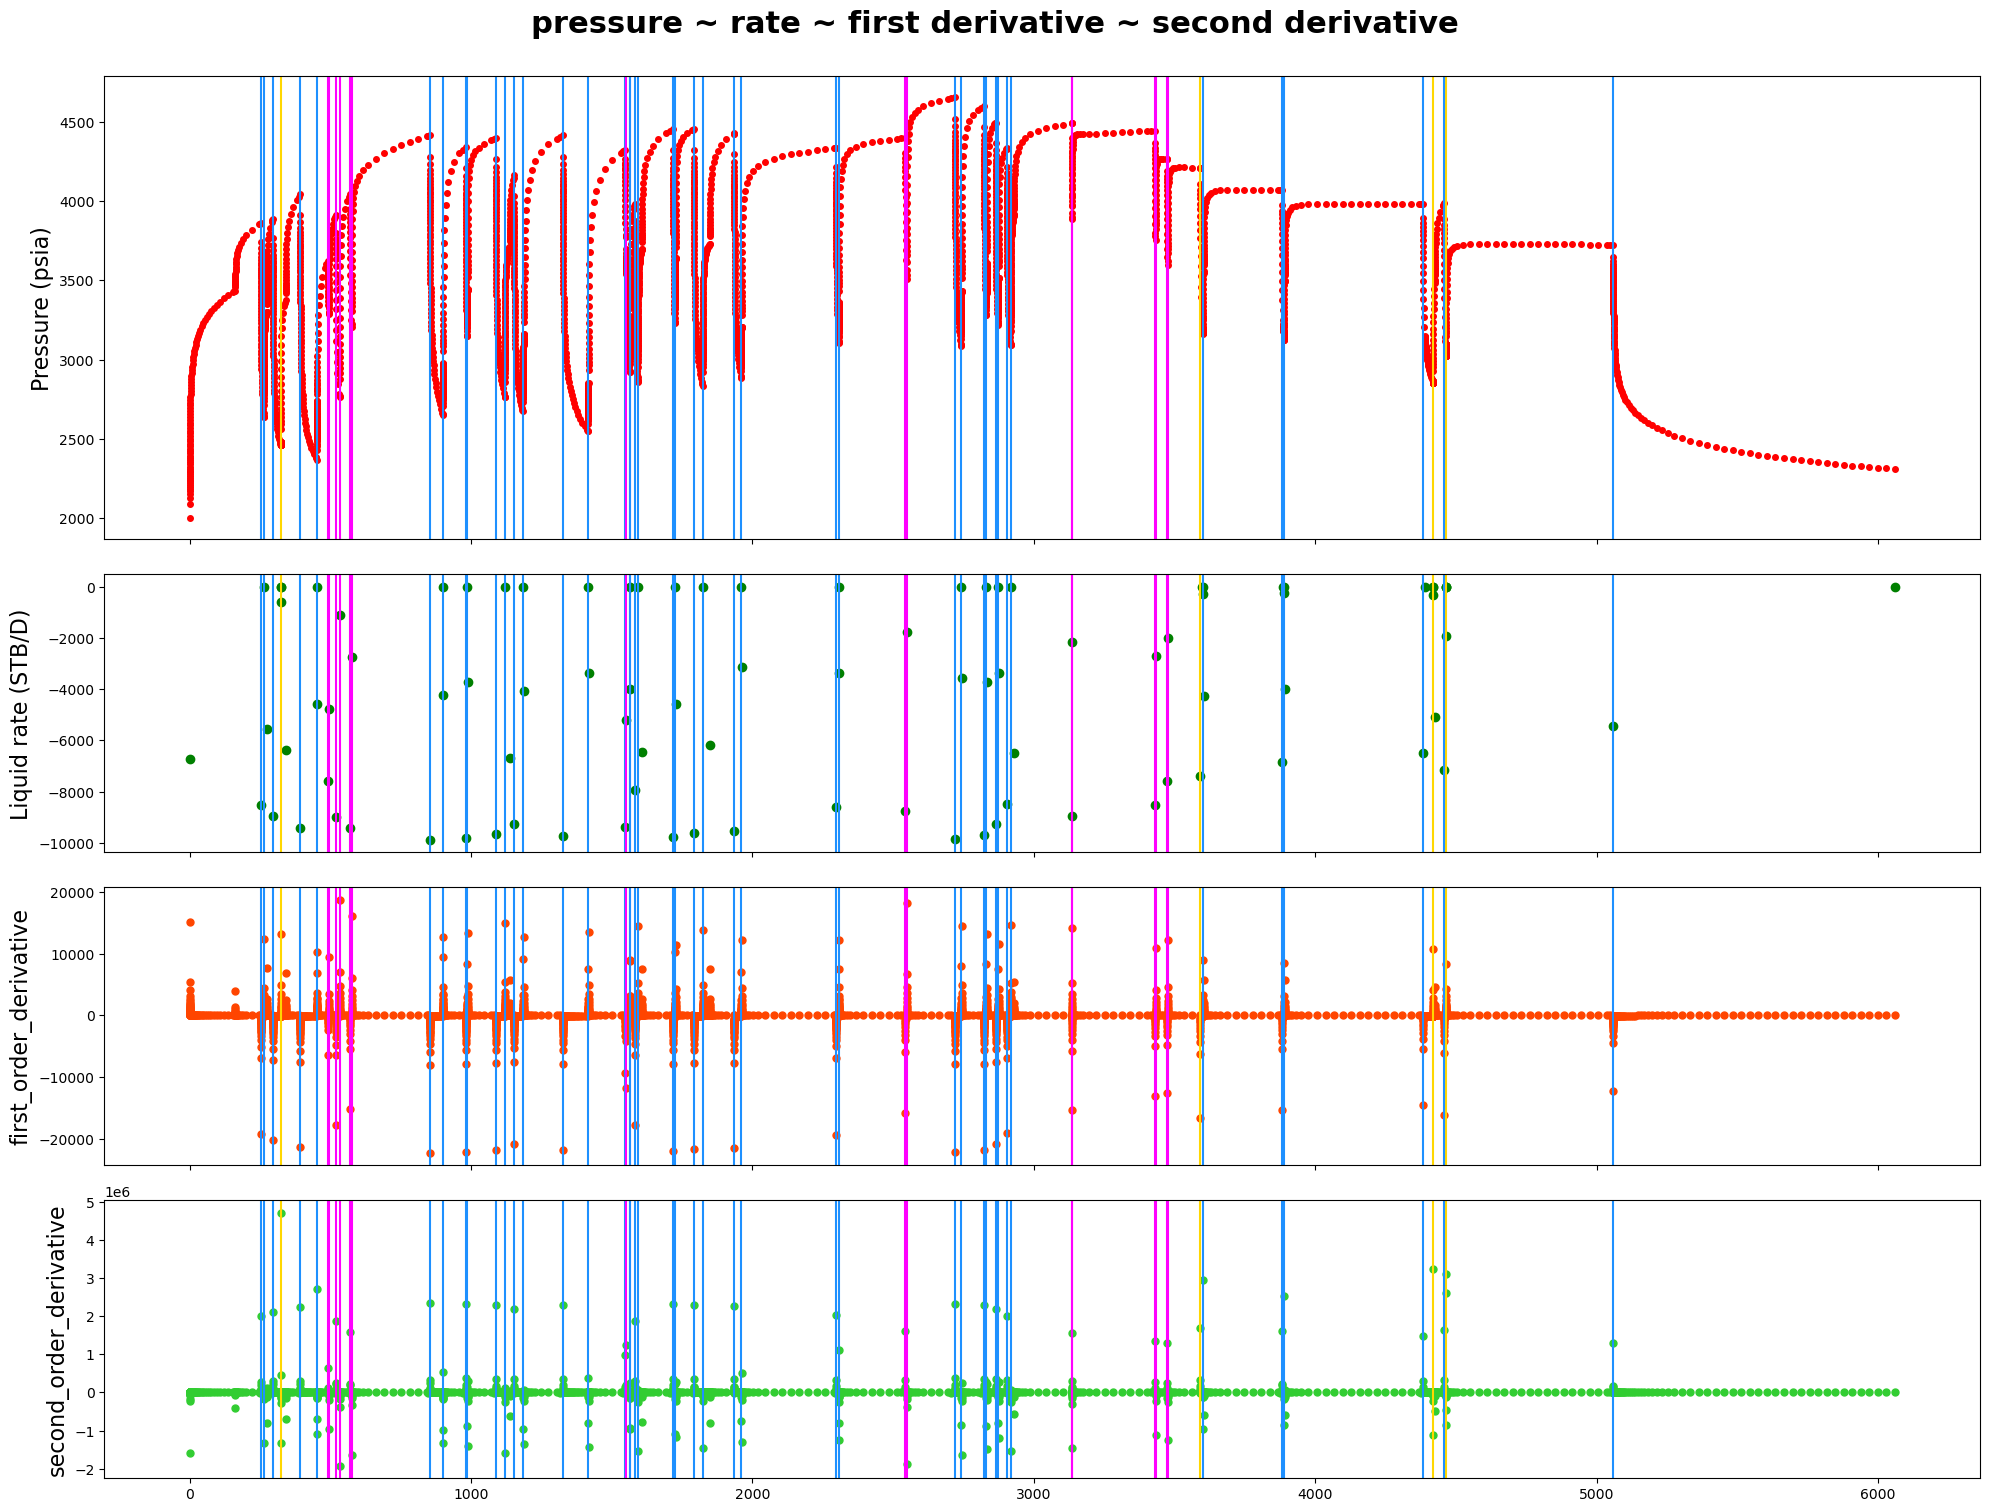

In [15]:
breakpoints_detected=detect_breakpoints_3(first_order_derivative,second_order_derivative)
print(len(breakpoints_detected))
print(breakpoints_detected)
plot_detection_statistics(breakpoints_detected,ground_truth)

plot_4_metrics(pressure_df,
               rate_df,
               breakpoints_detected,
               ground_truth,
               colum_names)

c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


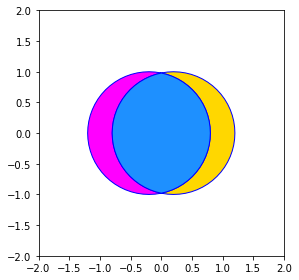

In [16]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.2,0).buffer(1.)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

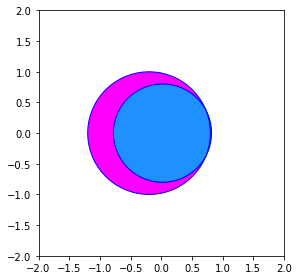

In [17]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.02,0).buffer(0.8)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()